### Importing Libraries

In [8]:
# import the required libraries
import nltk
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from matplotlib import style
style.use('ggplot')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
 tweet_df = pd.read_csv('/content/train.csv',encoding='unicode_escape')
 
#tweet_df = pd.read_excel('/content/Book1.xlsx')


In [10]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [11]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      36540 non-null  int64 
 1   label   36540 non-null  int64 
 2   tweet   36540 non-null  object
dtypes: int64(2), object(1)
memory usage: 856.5+ KB


In [12]:
#creating a function to process the data
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags = re.MULTILINE)
    tweet = re.sub(r'\@w+|\#','', tweet)
    tweet = re.sub(r'[^\w\s]','',tweet)
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet)
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [13]:
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

In [14]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [15]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [[lemmatizer.lemmatize(word)] for word in data]
    return data

In [16]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

In [17]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33943 entries, 0 to 36539
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      33943 non-null  int64 
 1   label   33943 non-null  int64 
 2   tweet   33943 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
tweet_df['label'].value_counts()

0    30290
1     3653
Name: label, dtype: int64

> Tweets with 0 as lable are saved in this variable

In [19]:
tweet_df.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time urãâââ ãâââãâââãâââãâ...
4,5,0,factsguide society motivation


In [20]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time urãâââ ãâââãâââãâââãâ...
4,5,0,factsguide society motivation


> Tweets with 1 as lable are saved in this variable

In [21]:
hate_tweets = tweet_df[tweet_df.label == 1]
hate_tweets.head()

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...


# VECTORIZATION

In [22]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [23]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Number of features: 529799

First 20 features: 
['0000001', '0000001 polluting', '0000001 polluting niger', '00027', '00027 photooftheday', '00027 photooftheday music', '001', '0035', '00h30', '01', '01 4995', '01 4995 rustic', '01 7900', '01 7900 shopalyssas', '01 blog', '01 blog silver', '01 croatia', '01 croatia happy', '01 may', '01 may actual']


# Index of variable

>X    -     tweets after vectorized(converted into numbers)

>Y    -     labels

>Z    -     Tweets in form of text

>ZZ   -     labels

In [24]:
##################### changeed here
X = tweet_df['tweet']
#
# print(X)
Z=X
# print(Z)
Y = tweet_df['label']
ZZ=Y
X = vect.transform(X)
# print(X)

> Split on Vectorized Data

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

> Split on Text Data

In [26]:
x1_train, x1_test, y1_train, y1_test = train_test_split(Z, ZZ, test_size=0.5, random_state=42)

MYstry


In [27]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.naive_bayes import MultinomialNB
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(x1_train)
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# clf = MultinomialNB().fit(X_train_tfidf, y_train)

# Logistic Reg

In [28]:
y_train

27375    0
13523    0
35766    0
14427    0
5186     0
        ..
18079    1
6576     0
12010    0
881      0
16926    0
Name: label, Length: 16971, dtype: int64

In [29]:
logreg = LogisticRegression()


In [30]:
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 89.32%


In [31]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[15123    10]
 [ 1802    37]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15133
           1       0.79      0.02      0.04      1839

    accuracy                           0.89     16972
   macro avg       0.84      0.51      0.49     16972
weighted avg       0.88      0.89      0.85     16972



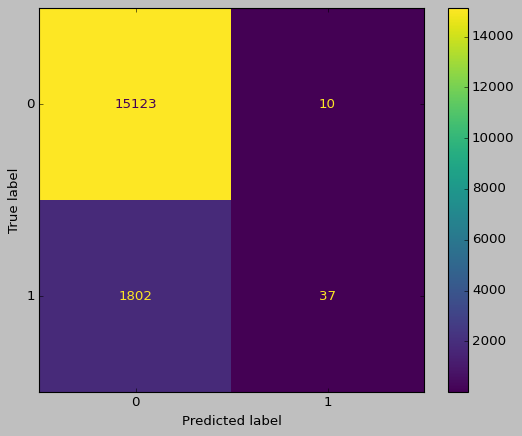

In [32]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

# Decison Tree

In [33]:

from sklearn import tree
model = tree.DecisionTreeClassifier()

model.fit(x_train, y_train)


model_predict = model.predict(x_test)
model_acc = accuracy_score(model_predict, y_test)
print("Test accuarcy: {:.2f}%".format(model_acc*100))



Test accuarcy: 89.85%


In [34]:
print(confusion_matrix(y_test, model_predict))
print("\n")
print(classification_report(y_test, model_predict))

[[14425   708]
 [ 1015   824]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94     15133
           1       0.54      0.45      0.49      1839

    accuracy                           0.90     16972
   macro avg       0.74      0.70      0.72     16972
weighted avg       0.89      0.90      0.89     16972



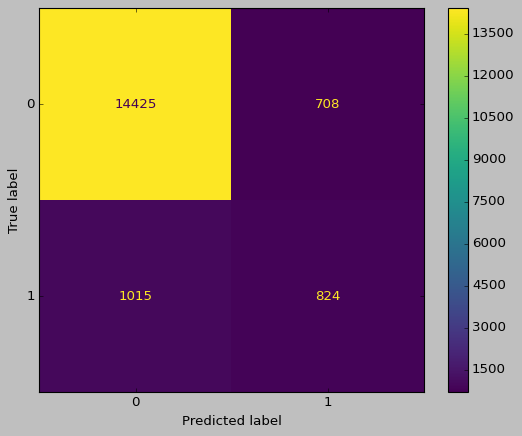

In [35]:
style.use('classic')
cm = confusion_matrix(y_test, model_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

# KNN

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
clf = KNeighborsClassifier(n_neighbors = 2)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
training_score = clf.score(x_train, y_train)
test_score = clf.score(x_test, y_test)
print(test_score)
print(training_score)

0.8937662031581428
0.900948677155147


In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print(cm)  

print("\n")
print(classification_report(y_test, y_pred))

Accuracy :  0.8937662031581428
[[15133     0]
 [ 1803    36]]


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     15133
           1       1.00      0.02      0.04      1839

    accuracy                           0.89     16972
   macro avg       0.95      0.51      0.49     16972
weighted avg       0.91      0.89      0.85     16972



# SVM

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
classes = 4
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
model.fit(x_train, y_train)
y=model.predict(x_test)
y2=model.predict(x_train)

from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)


# import matplotlib.pyplot as plt
# color = ['black' if c == 0 else 'lightgrey' for c in y]
# plt.scatter(x_train[:,0], x_train[:,1], c=color)

# # Create the hyperplane
# w = model.coef_[0]
# a = -w[0] / w[1]
# xx = np.linspace(-2.5, 2.5)
# yy = a * xx - (model.intercept_[0]) / w[1]

# # Plot the hyperplane
# plt.plot(xx, yy)
# plt.axis("off"), plt.show();


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y))
print(cm)  

print("\n")
print(classification_report(y_test, y))